### Import

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

### Fake Data

In [20]:
nPoints = 200
maxDistance = 0.2
X = (np.random.random((nPoints,2))-0.5)*1.5
X[0,:] = 0
Dm = squareform(pdist(X))

### Create Graph

In [21]:
G = {}
for i in range(nPoints):
    for j in range(nPoints):
        if (i != j):
            distance = Dm[i,j]
            if (distance < maxDistance):
                if i in G:
                    edges = G[i]
                    edges.append(j)
                    G[i] = edges
                else:
                    G[i] = [j]

### Plot Graph

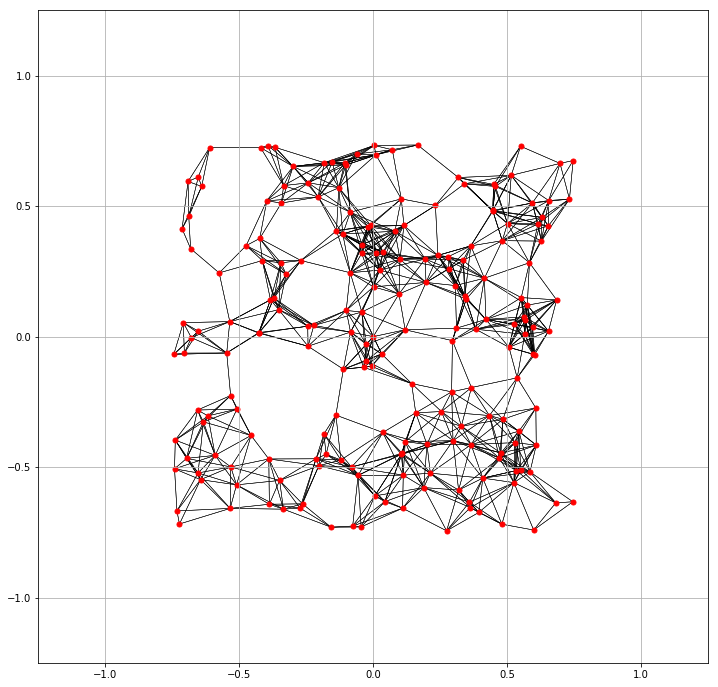

In [53]:
plt.figure(figsize=(12,12))
for node in G:
    for edge in G[node]:
        x1 = X[node,0]
        y1 = X[node,1]
        x2 = X[edge,0]
        y2 = X[edge,1]
        plt.plot([x1,x2],[y1,y2],c='k',linewidth=0.5,zorder=0)
plt.scatter(X[:,0],X[:,1],c='r',s=25,zorder=1)
plt.axis((-1.25,1.25,-1.25,1.25));
plt.grid()

### Breadth First Search

In [72]:
startNode = 0
visited = [startNode]
Q = [startNode]
visited = [0]
order = [0]
while (len(Q) > 0):
    node = Q[0]
    for edge in G[node]:
        if edge not in visited:
            order.append(count)
            count = count + 1
            visited.append(edge)
            Q.append(edge)
    Q = Q[1:]
order = np.array(order)
order = order / nPoints

### Colormap

In [73]:
C = np.zeros((order.shape[0],3))
C[:,0] = order
C[:,1] = 1

### Plot

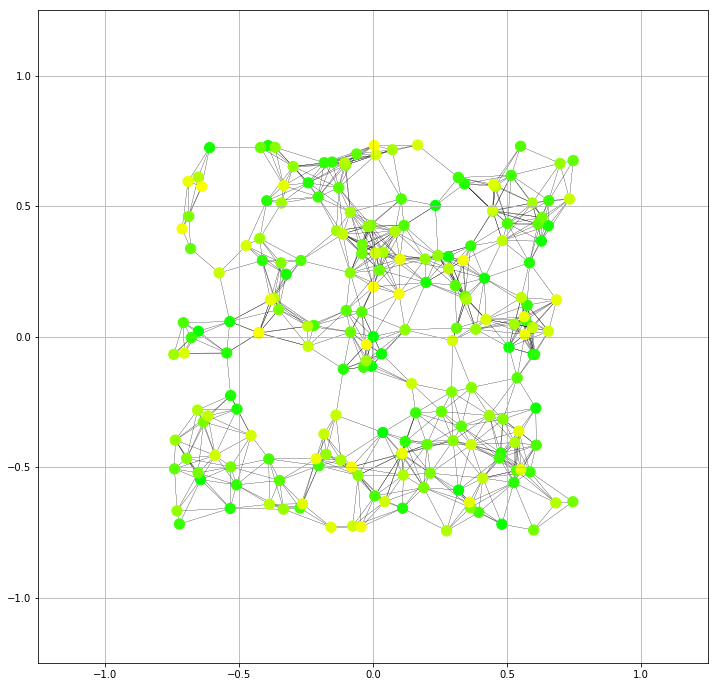

In [74]:
plt.figure(figsize=(12,12))
for node in G:
    for edge in G[node]:
        x1 = X[node,0]
        y1 = X[node,1]
        x2 = X[edge,0]
        y2 = X[edge,1]
        plt.plot([x1,x2],[y1,y2],c='k',linewidth=0.15,zorder=0)
plt.scatter(X[:,0],X[:,1],c=C,s=105,zorder=1)
plt.axis((-1.25,1.25,-1.25,1.25));
plt.grid()